# **Vamos a *clasificar* residuos**


---
Actividades :)

1. Importar imagenes para ser procesadas por pytorch
2. Explorar los datos (distribución, mostrar imágenes, estadísticas, etc.)
3. Estudiar Resnet
4. Cargar Resnet con los valores de redes conocidas



Montemosh drive

In [1]:
import os
import io

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Carguemosh el conjunto de datosh

**Paso 1. Importar**

Este es un código de stack overflow [How do you load images into Pytorch DataLoader?](https://https://stackoverflow.com/questions/50052295/how-do-you-load-images-into-pytorch-dataloader)

```
import torch
import torchvision
import torchvision.transforms as transforms

# Dataset generator
def load_dataset():
    data_path = 'data/train/'
    train_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=torchvision.transforms.ToTensor()
    )
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=64,
        num_workers=0,
        shuffle=True
    )
    return train_loader

for batch_idx, (data, target) in enumerate(load_dataset()):
    #train network
```

In [2]:
#Descomprimir el dataset como ejemplo
!unzip -uq "/content/drive/My Drive/trashnet-data/dataset-resized.zip" -d "/content/drive/My Drive/data resized"

# Split
!pip install split-folders tqdm
import split_folders,tqdm

In [3]:
#split_folders.fixed('/content/drive/My Drive/data resized/dataset-resized', 
#                    output="/content/drive/My Drive/data resized/dataset-resized/data-splitted", 
#                    seed=1337, fixed=(2450, 77), oversample=False) 

if os.path.isdir("/content/drive/My Drive/data resized/dataset-resized/data-splitted"):
  print("The data is already splitted")
else:
  split_folders.ratio('/content/drive/My Drive/data resized/dataset-resized', 
                    output="/content/drive/My Drive/data resized/dataset-resized/data-splitted", 
                    seed=1337, ratio=(0.8, 0.1, 0.1))

The data is already splitted


Cargaremosh imágenes en un objeto `ImageFolder`. El método lee el root donde esta la data clasificada por directorios y retorna una serie de tuplas `(x,y)`, con `x` siendo cada imagen y `y` siendo la categoría o folder de cada una. Usaremosh el dataset generator del hilo de stack overflow:

In [0]:
#for folders in os.walk('/content/drive/My Drive/data resized/dataset-resized/data-splitted'):
#  print(folders)

Hay que probar el proyecto con y sin normalización sugerida por Pytorch

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

data_path = '/content/drive/My Drive/data resized/dataset-resized/data-splitted'
folders = ['train','val','test']
data_transforms = transforms.Compose([
                                  transforms.Resize((224,224)),
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
# Dataset generator
def load_dataset(data_path, folders):

  # imagefolder_dict = {}

  # for name in folders:

  #   data_dir = os.path.join(data_path, name)

  #   imagefolder_dict[name] = torchvision.datasets.ImageFolder(
  #       root=data_dir,
  #       transform=torchvision.transforms.ToTensor()
  #   )

  imagefolder_dict = {name: torchvision.datasets.ImageFolder(os.path.join(data_path, name), data_transforms) for name in folders}

  return imagefolder_dict

imagefolder_dict = load_dataset(data_path, folders)
imagefolder_dict

{'test': Dataset ImageFolder
     Number of datapoints: 257
     Root location: /content/drive/My Drive/data resized/dataset-resized/data-splitted/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ), 'train': Dataset ImageFolder
     Number of datapoints: 2019
     Root location: /content/drive/My Drive/data resized/dataset-resized/data-splitted/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ), 'val': Dataset ImageFolder
     Number of datapoints: 251
     Root location: /content/drive/My Drive/data resized/dataset-resized/data-splitted/val
     StandardTransform
 Transform: Compose(
                Res

In [0]:
train_data = imagefolder_dict['train']
test_data = imagefolder_dict['test']
val_data = imagefolder_dict['val']

A continuación, una prueba para hacer *slice* al objeto:

In [6]:
train_data[0][0].shape
# train_data[3][0].max()

torch.Size([3, 224, 224])



---


**Paso 2. Exploración (del _training set_)**

En esta celda, experimentamos con los `input` de `imshow()` para mostrar las imágenes cargadas:

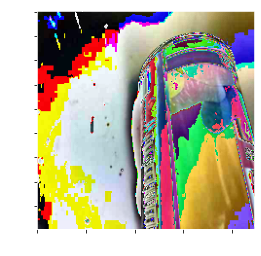

In [13]:
import matplotlib.pyplot as plt
import matplotlib

#Convert tensor to PIL
to_pil=torchvision.transforms.ToPILImage()
img=to_pil(train_data[1001][0])
fig, ax = plt.subplots(1,1)
plt.imshow(img)
ax.set_facecolor('#1B212C');
plt.xticks(fontsize=12, color='white');
plt.yticks(fontsize=12, color='white');
matplotlib.rc('axes', edgecolor='white')
plt.savefig('/content/drive/My Drive/Factored AI project/normalizedimage1.png', facecolor='#1B212C')
plt.pause(0.001)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


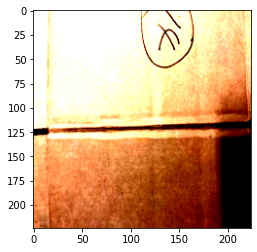

In [0]:
import numpy as np

#Convert tensor to numpy array and rearrange shape to fit in the imshow requirement
numpy_img = np.moveaxis(train_data[0][0].numpy(),0,-1)
plt.imshow(numpy_img)
plt.pause(0.001)
plt.show()

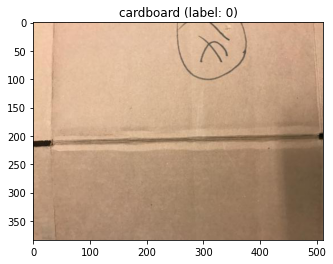

In [0]:
# for i in range(len(train_data)):
  # print(train_data[i][1])
type(train_data)
type(train_data.targets)
# train_data.samples
train_data.classes
# train_data.imgs
plt.title("{} (label: {})".format(train_data.classes[train_data.targets[0]], train_data.targets[0]))
plt.imshow(train_data.loader(train_data.imgs[0][0]));
# train_data.

In [0]:
label_name = list()
for target in val_data.targets:
  label_name.append(val_data.classes[target])



A continuación, un _slicing_ al `ImageFolder` (ver: [Can not slice torchvision MNIST dataset](https://stackoverflow.com/questions/54251798/pytorch-can-not-slice-torchvision-mnist-dataset)):

In [0]:
categ = train_data.targets

Ahora, veamos la distribución de las diferentes imágenes en un barplot

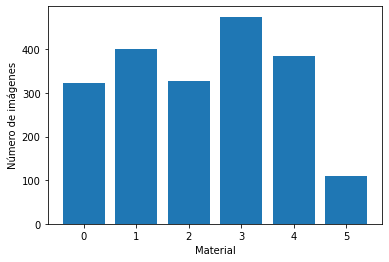

In [0]:
#Barplot
x_num = list(range(6))
x = [str(num) for num in x_num]
height = [categ.count(num) for num in x_num]
plt.bar(x=x, height=height);
plt.ylabel('Número de imágenes');
plt.xlabel('Material');

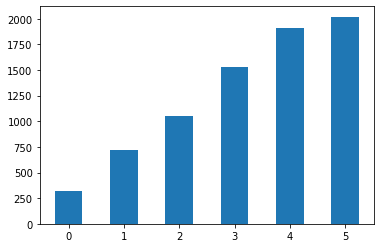

In [0]:
#Histograma acumulado
plt.hist(categ,bins=range(7),align='left',rwidth=0.5, cumulative=True)
plt.show()



---

**Paso 3. ResNet**

Ingresamosh el tensor a una ResNet pre entrenada, y luego acoplamosh una capa con *Softmax*.

a. _Some Inputs (input arguments)_

In [0]:
# Architecture
model_name = "resnet"

# Clases
num_classes = len(x)

# Batch size
batch_size = 16

# Epochs
num_epochs = 25

# If false, then is Fine Tuning
feature_extract = True

"In finetuning, we start with a pretrained model and update all of the model’s parameters for our new task, in essence retraining the whole model. In feature extraction, we start with a pretrained model and only update the final layer weights from which we derive predictions." (ver: [FINETUNING TORCHVISION MODELS)](https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html)

b. _Load data_

Debemosh generar un objeto ```dataLoader```, que es otro de los _inputs_ del modelo:

In [0]:
def dataloaders_dict(imagefolder_dict):

  dataloaders_dict = {name: torch.utils.data.DataLoader(imagefolder_dict[name], batch_size = 251, 
                                                        shuffle = False, num_workers = 2) for name in ['val', 'test']}
                      #imagefolder_dict.keys()}
                      
  return dataloaders_dict

dataloaders_dict = dataloaders_dict(imagefolder_dict)
dataloaders_dict['train'] = torch.utils.data.DataLoader(imagefolder_dict['train'], batch_size = batch_size, 
                                                        shuffle = True, num_workers = 2)
dataloaders_dict.keys() == imagefolder_dict.keys()

True

In [0]:
train_dl = dataloaders_dict['train']
test_dl = dataloaders_dict['test']
val_dl = dataloaders_dict['val']

In [0]:
for i, data in enumerate(train_dl, 0):
  # inputs, labels = data
  print(data[1])
  # print(type(data))
  # print(inputs, " ", labels)
  break
# list(enumerate(train_loader, 0))[0]

tensor([3, 3, 1, 2, 0, 4, 2, 2, 4, 0, 1, 5, 0, 4, 1, 3])


c. _Initialize_

In [0]:
from __future__ import print_function
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

Aquí se encuentra el detalle del modelo Resnet50:
https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py

In [0]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False
    return

def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    # Initialize these variables which will be set in this if statement. Each of these
    #   variables is model specific.
    model_ft = None
    input_size = 0

    if model_name == "resnet":
        """ Resnet50
        """
        model_ft = models.resnet50(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    else:
        print("Invalid model name, exiting...")
        exit()

    return model_ft, input_size

# Initialize the model for this run
model_ft, input_size = initialize_model("resnet", num_classes, feature_extract, use_pretrained=True)

# Print the model we just instantiated
print(model_ft)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1,

d. _Create Optimizer_

Comprobamos si `Goolge Colab` usa _cuda_:

In [0]:
torch.cuda.is_available()

True

Implementamosh el `device` para mandar el tensor a procesar en GPU:

In [0]:
# Elegir CPU o GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Enviar el tensor a uno de ellos
model_ft = model_ft.to(device)

Elección entre _feature extraction_ y _fine tunning_. Nosotros, _featuriamos la extracción_:

In [0]:
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)

Params to learn:
	 fc.weight
	 fc.bias


e. _Última capa (loss function)_

In [0]:
# criterion = nn.Softmax(1)
criterion = nn.CrossEntropyLoss()



---


**Paso 3. Entrenar el modelo**

In [0]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, is_inception=False):
    since = time.time()

    val_acc_history = []
    val_loss_history = []
    train_acc_history = []
    train_loss_history = []
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train
                    #   mode we calculate the loss by summing the final output and the auxiliary output
                    #   but in testing we only consider the final output.
                    if is_inception and phase == 'train':
                        # From https://discuss.pytorch.org/t/how-to-optimize-inception-model-with-auxiliary-classifiers/7958
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                        # loss = criterion

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)
                val_loss_history.append(epoch_loss)
            if phase == 'train':
                train_acc_history.append(epoch_acc)
                train_loss_history.append(epoch_loss)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history, val_loss_history, train_acc_history, train_loss_history

Entrenar y evaluar _accuracy_

In [0]:
# Train and evaluate
model_ft, hist_val_acc, hist_val_loss, hist_train_acc, hist_train_loss = train_model(model_ft, dataloaders_dict, criterion, 
                                                                             optimizer_ft, num_epochs=num_epochs, 
                                                                             is_inception=False)

Epoch 0/24
----------
train Loss: 1.1702 Acc: 0.5998
val Loss: 0.7919 Acc: 0.7131

Epoch 1/24
----------
train Loss: 0.7258 Acc: 0.7637
val Loss: 0.6167 Acc: 0.8207

Epoch 2/24
----------
train Loss: 0.6181 Acc: 0.8034
val Loss: 0.5512 Acc: 0.8207

Epoch 3/24
----------
train Loss: 0.5512 Acc: 0.8192
val Loss: 0.5500 Acc: 0.8247

Epoch 4/24
----------
train Loss: 0.5194 Acc: 0.8336
val Loss: 0.5278 Acc: 0.8247

Epoch 5/24
----------
train Loss: 0.4766 Acc: 0.8405
val Loss: 0.4850 Acc: 0.8406

Epoch 6/24
----------
train Loss: 0.4727 Acc: 0.8430
val Loss: 0.4917 Acc: 0.8406

Epoch 7/24
----------
train Loss: 0.4418 Acc: 0.8579
val Loss: 0.4842 Acc: 0.8327

Epoch 8/24
----------
train Loss: 0.4363 Acc: 0.8588
val Loss: 0.4541 Acc: 0.8566

Epoch 9/24
----------
train Loss: 0.4187 Acc: 0.8668
val Loss: 0.4811 Acc: 0.8127

Epoch 10/24
----------
train Loss: 0.4010 Acc: 0.8678
val Loss: 0.4570 Acc: 0.8367

Epoch 11/24
----------
train Loss: 0.3989 Acc: 0.8663
val Loss: 0.4517 Acc: 0.8486

Ep

Ahora, traemosh los _output_ de la red ([save predictions from pytorch model
](https://stackoverflow.com/questions/48264368/save-predictions-from-pytorch-model))

In [0]:
dataiter = iter(val_dl)
images, labels = dataiter.next()

images = images.to(device)
outputs = model_ft(images)

Aplicamosh [`Softmax`](https://pytorch.org/docs/stable/nn.functional.html) para obtener las probabilidades asociadas:

In [0]:
print(outputs.data.shape)
print(outputs.data[0])
print(torch.nn.functional.softmax(outputs.data, dim=1))

softputs = torch.nn.functional.softmax(outputs.data, dim=1)
print(softputs.data[0])

torch.Size([251, 6])
tensor([ 4.4793,  1.0360, -3.1137, -3.3650, -0.1374,  1.4563], device='cuda:0')
tensor([[9.1626e-01, 2.9283e-02, 4.6180e-04, 3.5918e-04, 9.0575e-03, 4.4581e-02],
        [9.0202e-01, 1.9723e-03, 1.0675e-02, 5.8973e-02, 7.4108e-04, 2.5614e-02],
        [8.4094e-01, 2.2133e-03, 3.8579e-03, 1.5144e-01, 5.3968e-04, 1.0077e-03],
        ...,
        [4.1072e-02, 1.1828e-03, 6.1087e-03, 8.4823e-03, 7.7888e-04, 9.4237e-01],
        [4.7745e-03, 1.0861e-02, 8.8170e-03, 2.3998e-02, 1.5125e-02, 9.3642e-01],
        [7.1556e-02, 6.5811e-03, 1.5454e-03, 1.9977e-02, 1.1125e-03, 8.9923e-01]],
       device='cuda:0')
tensor([9.1626e-01, 2.9283e-02, 4.6180e-04, 3.5918e-04, 9.0575e-03, 4.4581e-02],
       device='cuda:0')




---

**Paso 3. Evaluación del desempeño**

Vamosh a probar el _1-top_ y _3-top_, calculado con ayuda de un snippet de GitHub ([bhheo/AB_distillation](https://github.com/bhheo/AB_distillation/blob/master/MITscenes_AB_distillation.py))

In [0]:
from torch.autograd import Variable
from __future__ import print_function

class AverageMeter(object):
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

def accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
        wrong_k = batch_size - correct_k
        res.append(correct_k.mul_(100.0 / batch_size))

    return res

Exploramos las salidas de [.`view`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view) y [.`topk`](https://pytorch.org/docs/stable/torch.html)

In [0]:
# Pruebas de los Top-k
print(labels)
print("\n")
print(labels.view(1,-1))
_, pred = softputs.topk(5, 1, True, True)
print(pred)
print("\n")
pred = pred.t()
print(labels.view(1, -1).expand_as(pred))
print(labels.view(1, -1).expand_as(pred).shape)
print(pred.shape)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])


tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 

In [0]:
top1 = AverageMeter()
top3 = AverageMeter()
top5 = AverageMeter()
for batch_idx, (inputs, targets) in enumerate(val_dl):
    if torch.cuda.is_available():
        inputs, targets = inputs.cuda(), targets.cuda()
    inputs, targets = Variable(inputs), Variable(targets)
    err1, err3, err5 = accuracy(softputs.data, targets, topk=(1, 3, 5))
    top1.update(err1[0], inputs.size(0))
    top3.update(err3[0], inputs.size(0))
    top5.update(err5[0], inputs.size(0))

In [0]:
print(top1.avg)
print(top3.avg)
print(top5.avg)

tensor(87.2510, device='cuda:0')
tensor(97.2112, device='cuda:0')
tensor(100., device='cuda:0')


Grafiquemosh cómo está aprendiendo este modelo (Accuracy):

In [0]:
# Test para ver el contenido
print(hist_val_acc)
print(hist_val_loss)

[tensor(0.7131, device='cuda:0', dtype=torch.float64), tensor(0.8207, device='cuda:0', dtype=torch.float64), tensor(0.8207, device='cuda:0', dtype=torch.float64), tensor(0.8247, device='cuda:0', dtype=torch.float64), tensor(0.8247, device='cuda:0', dtype=torch.float64), tensor(0.8406, device='cuda:0', dtype=torch.float64), tensor(0.8406, device='cuda:0', dtype=torch.float64), tensor(0.8327, device='cuda:0', dtype=torch.float64), tensor(0.8566, device='cuda:0', dtype=torch.float64), tensor(0.8127, device='cuda:0', dtype=torch.float64), tensor(0.8367, device='cuda:0', dtype=torch.float64), tensor(0.8486, device='cuda:0', dtype=torch.float64), tensor(0.8725, device='cuda:0', dtype=torch.float64), tensor(0.8406, device='cuda:0', dtype=torch.float64), tensor(0.8526, device='cuda:0', dtype=torch.float64), tensor(0.8566, device='cuda:0', dtype=torch.float64), tensor(0.8327, device='cuda:0', dtype=torch.float64), tensor(0.8606, device='cuda:0', dtype=torch.float64), tensor(0.8566, device='cuda

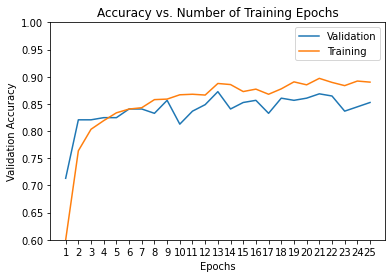

In [0]:
npa_histV_acc = [h.cpu().numpy() for h in hist_val_acc]
npa_histT_acc = [h.cpu().numpy() for h in hist_train_acc]

plt.title("Accuracy vs. Number of Training Epochs")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")

plt.plot(range(1,num_epochs+1), npa_histV_acc, label="Validation")
plt.plot(range(1,num_epochs+1), npa_histT_acc, label="Training")
plt.ylim((0.6,1.))
plt.xticks(np.arange(1, num_epochs+1, 1.0))
plt.legend()
plt.show()

Grafiquemosh cómo está aprendiendo este modelo (Loss func.):

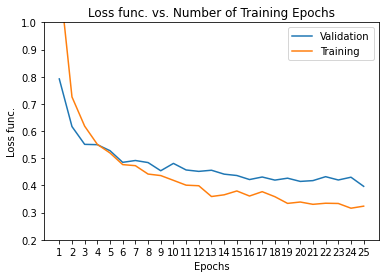

In [0]:
npa_histV_loss = hist_val_loss
npa_histT_loss = hist_train_loss

plt.title("Loss func. vs. Number of Training Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss func.")

plt.plot(range(1,num_epochs+1), npa_histV_loss, label="Validation")
plt.plot(range(1,num_epochs+1), npa_histT_loss, label="Training")
plt.ylim((0.2,1.))
plt.xticks(np.arange(1, num_epochs+1, 1.0))
plt.legend()
plt.show()

We ROCs...  ([Receiver Operating Characteristic](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py))

In [0]:
# print(labels.numpy())
# print("\n")
# print(softputs.data.shape)

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

y_label = label_binarize(labels.numpy(), classes=[0,1,2,3,4,5])
n_classes = y_label.shape[1]
y_score = softputs.cpu().data.numpy()

# print(y[:,0])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_label[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

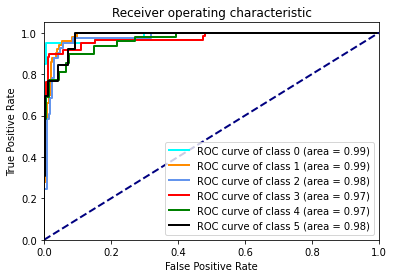

In [0]:
from itertools import cycle

plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','green','black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

[Matrish de confusion](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) de sklearn:

In [0]:
from sklearn.metrics import confusion_matrix

# print(labels.numpy())
# print("\n")
# print(y_score.argmax(axis=1))

confusion_matrix(labels.numpy(), y_score.argmax(axis=1))

array([[37,  0,  0,  3,  0,  0],
       [ 0, 46,  2,  0,  1,  1],
       [ 0,  3, 37,  0,  1,  0],
       [ 1,  0,  2, 53,  2,  1],
       [ 0,  4,  5,  1, 36,  2],
       [ 0,  0,  2,  1,  0, 10]])

Matriz de confusion con un [heatmap](https://matplotlib.org/3.2.0/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py) de matplotlib:

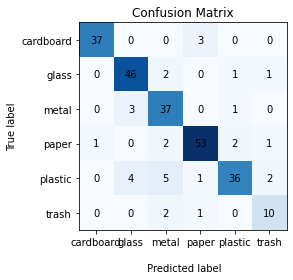

In [0]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
# titles_options = [("Confusion matrix, without normalization", None),
#                   ("Normalized confusion matrix", 'true')]
# for title, normalize in titles_options:
#     disp = plot_confusion_matrix(y_score.argmax(axis=1), val_data, labels.numpy(),
#                                  display_labels=class_names,
#                                  cmap=plt.cm.Blues,
#                                  normalize=normalize)
#     disp.ax_.set_title(title)

#     print(title)
#     print(disp.confusion_matrix)

# plt.show()

# import seaborn as sns
# sns.heatmap(confusion_matrix(labels.numpy(), y_score.argmax(axis=1)), 
#             linewidth=0.5, cmap='YlGnBu')

fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix(labels.numpy(), y_score.argmax(axis=1)), 
               cmap=plt.cm.Blues, interpolation='nearest')
ax.set_xticks(np.arange(len(y_score.argmax(axis=0))))
ax.set_yticks(np.arange(len(y_score.argmax(axis=0))))
ax.set_xticklabels(train_data.classes)
ax.set_yticklabels(train_data.classes)
ax.set_ylabel("True label")
ax.set_xlabel("\n Predicted label")

for i in range(len(y_score.argmax(axis=0))):
    for j in range(len(y_score.argmax(axis=0))):
        text = ax.text(j, i, confusion_matrix(labels.numpy(), y_score.argmax(axis=1))[i, j],
                       ha="center", va="center", color="k")
ax.set_title("Confusion Matrix")
fig.tight_layout();       
plt.show()